In [1]:
import os
import sys
import time
import errno
import time
import timeit


import numpy as np
import scipy as scp


import numba
from numba import jit

In [2]:
%pylab inline
#%matplotlib notebook

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings
warnings.simplefilter("ignore")

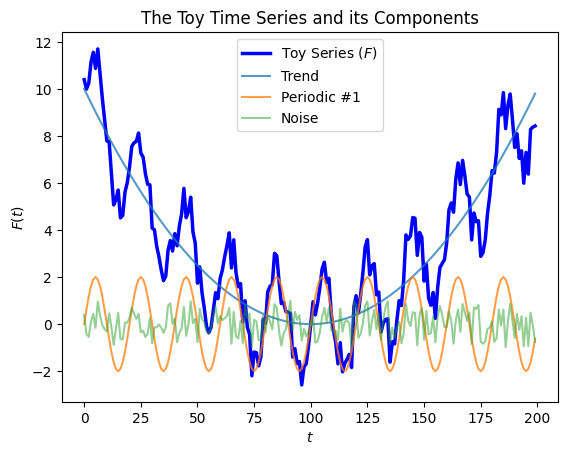

In [43]:
N = 200 # The number of time 'moments' in our toy series
t = np.arange(0,N)
trend = 0.001 * (t - 100)**2
p1, p2, p3 = 20, 30, 40

periodic1 = 2 * np.sin(2*pi*t/p1)
periodic2 = 0.75 * np.sin(2*pi*t/p2)

np.random.seed(123) # So we generate the same noisy time series every time.
noise = 2 * (np.random.rand(N) - 0.5)
# F = trend + periodic1 + periodic2 + noise
F = trend + periodic1 + noise

# Plot everything
plt.plot(t, F, lw=2.5,color= 'b')
plt.plot(t, trend, alpha=0.75)
plt.plot(t, periodic1, alpha=0.75)
# plt.plot(t, periodic2, alpha=0.75)
plt.plot(t, noise, alpha=0.5)
# plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Periodic #2", "Noise"])
plt.legend(["Toy Series ($F$)", "Trend", "Periodic #1", "Noise"])
plt.xlabel("$t$")
plt.ylabel("$F(t)$")
plt.title("The Toy Time Series and its Components");

In [5]:
F.shape

(200,)

In [7]:
L = 20 # The window length
K = N - L + 1  # number of columns in the trajectory matrix

X = np.column_stack([F[i:i+L] for i in range(0,K)])
d = 10

In [11]:
X.shape

(20, 181)

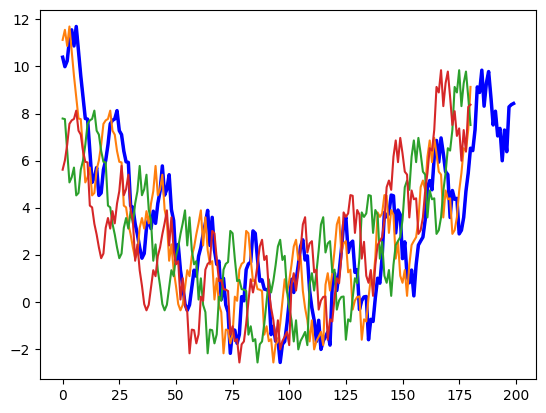

In [44]:
plt.plot(F)
plt.plot(t, F, lw=2.5,color= 'b')
plt.plot(X[3,:])
plt.plot(X[10,:])
plt.plot(X[18,:])

In [16]:
import numpy as np

def PCA_decomposition(A):
  M = np.mean(A, axis=0)
  C = A - M
  V = np.cov(C)
  values, vectors = np.linalg.eig(V)
    
  return values, vectors

In [17]:
from sklearn.preprocessing import StandardScaler
sX = StandardScaler(copy=True)
X_trans = sX.fit_transform(X)

In [18]:
values, vectors = PCA_decomposition(X)
values.shape, vectors.shape

((20,), (20, 20))

In [20]:
U_k = vectors
U_k.shape

(20, 20)

In [21]:


X_elem_pca = np.array([np.dot(np.dot(np.expand_dims(U_k[:,i], axis=1), np.expand_dims(U_k[:,i].T, axis=0)), X) for i in range(0,d)])


In [23]:
X_elem_pca.shape

(10, 20, 181)

In [39]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])


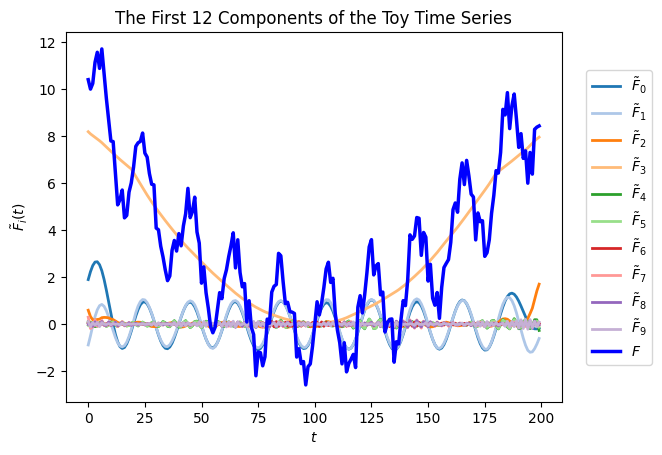

In [45]:
n = min(70,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem_pca[i])
    fig.axes.plot(t, F_i, lw=2)

fig.axes.plot(t, F, lw=2.5,color= 'b')
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 12 Components of the Toy Time Series")
fig.legend(legend, loc=(1.05,0.1));



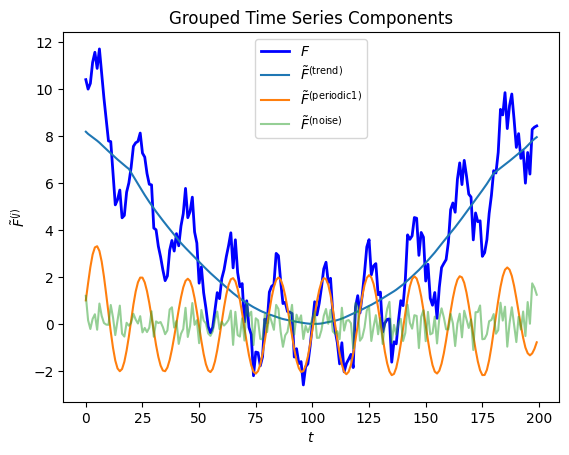

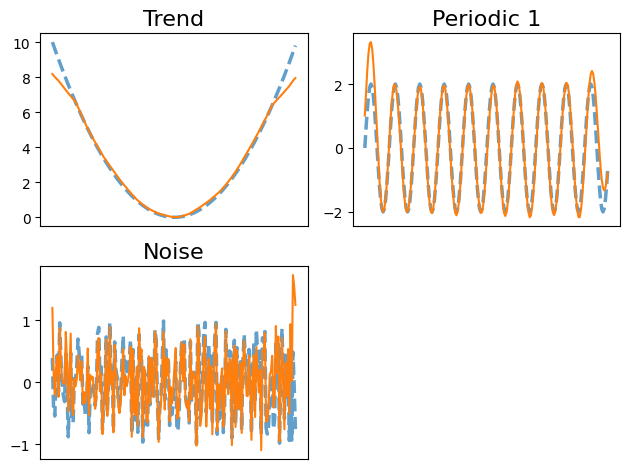

In [88]:
# Assemble the grouped components of the time series.
F_periodic1 = X_to_TS(X_elem_pca[[0,1]].sum(axis=0))
F_trend = X_to_TS(X_elem_pca[[3,]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem_pca[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem_pca[7:].sum(axis=0))
F_noise = F - F_trend - F_periodic1
# Plot the toy time series and its separated components on a single plot.
plt.plot(t,F, lw=2, color='b')
plt.plot(t, F_trend)
plt.plot(t, F_periodic1)

plt.plot(t, F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", trend, F_trend), 
              ("Periodic 1", periodic1, F_periodic1),
              ("Noise", noise, F_noise)]

# Plot the separated components and original components together.
fig = plt.figure()
n=1
for name, orig_comp, ssa_comp in components:
    ax = fig.add_subplot(2,2,n)
    ax.plot(t, orig_comp, linestyle="--", lw=2.5, alpha=0.7)
    ax.plot(t, ssa_comp)
    ax.set_title(name, fontsize=16)
    ax.set_xticks([])
    n += 1

fig.tight_layout()

In [61]:
n = min(70,d)
n

10

In [101]:
F_ = X_to_TS(X_elem_pca[[7]].sum(axis=0))


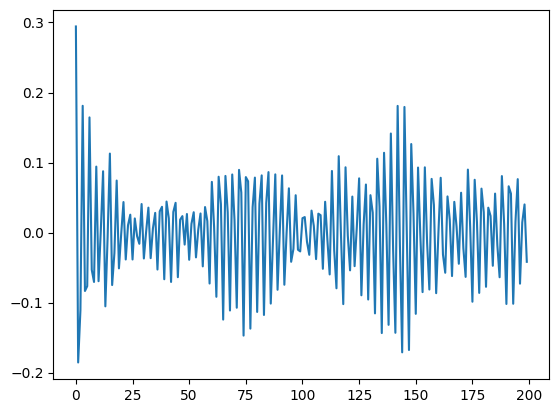

In [102]:
plt.plot(F_)

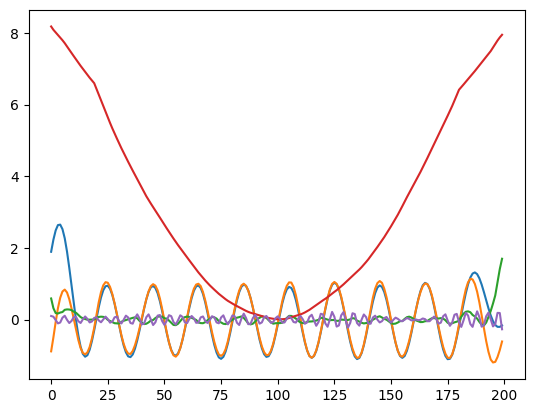

In [78]:
for i in range(5):
    F_i = X_to_TS(X_elem_pca[i])
    plt.plot(F_i)

In [65]:
F_10

NameError: name 'F_10' is not defined

In [ ]:
plt.plot(F)